In [1]:
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
#for building the model
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
df='D:\dataset mata'

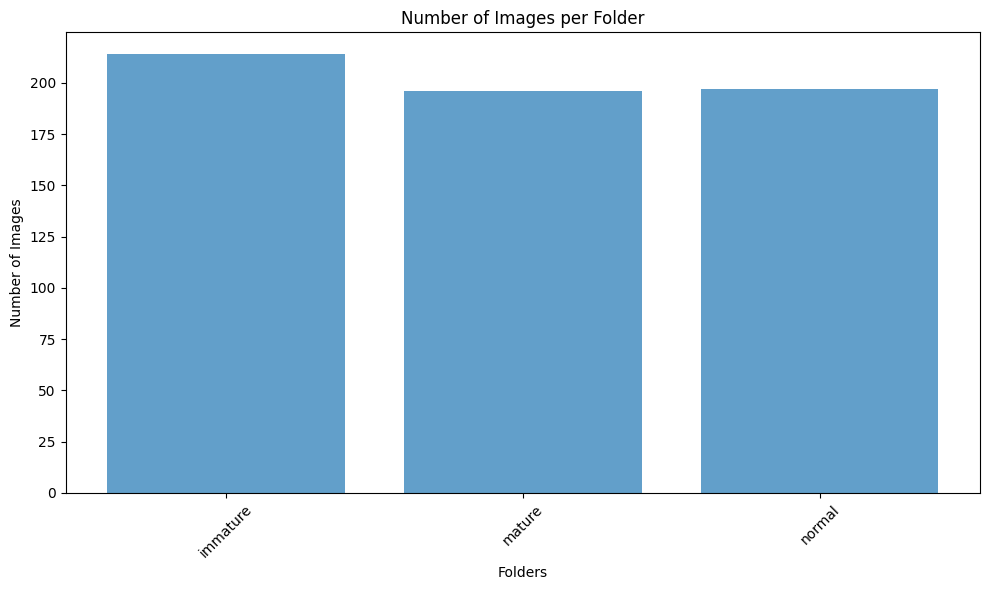

In [3]:
# Directory containing folders with images
root_dir = 'D:\dataset mata'

# Dictionary to store counts for each folder
folder_counts = {}

# Iterate through each folder in the root directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
        folder_counts[folder] = num_images

# Extract folder names and corresponding counts
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()

In [4]:
immature = os.listdir(os.path.join(df, 'D:\dataset mata\immature'))

mature = os.listdir(os.path.join(df, 'D:\dataset mata\mature'))

normal = os.listdir(os.path.join(df, 'D:\dataset mata\mature'))

In [5]:
X=[] #holding data
Y=[] #label

In [6]:
immature_dir = r'D:\dataset mata\immature'
immature = os.listdir(immature_dir)

for image_name in immature:
    file_path = os.path.join(immature_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(0)

In [7]:
# MATURE
mature_dir = r'D:\dataset mata\mature'
mature = os.listdir(mature_dir)

for image_name in mature:
    file_path = os.path.join(mature_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(1)

In [8]:
# NORMAL
normal_dir = r'D:\dataset mata\normal'
normal = os.listdir(normal_dir)

for image_name in normal:
    file_path = os.path.join(normal_dir, image_name)
    image = Image.open(file_path).convert('RGB')
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image).astype('float32') / 255.0)
    Y.append(2)

In [9]:
import numpy as np
print(np.unique(Y, return_counts=True))


(array([0, 1, 2]), array([214, 196, 197], dtype=int64))


In [10]:
X[1]

array([[[0.9647059 , 0.6862745 , 0.56078434],
        [0.9490196 , 0.7019608 , 0.58431375],
        [0.9372549 , 0.7254902 , 0.62352943],
        ...,
        [0.8117647 , 0.5882353 , 0.47843137],
        [0.8       , 0.57254905, 0.47843137],
        [0.83137256, 0.6039216 , 0.4862745 ]],

       [[0.9137255 , 0.72156864, 0.627451  ],
        [0.9607843 , 0.78039217, 0.6784314 ],
        [0.9411765 , 0.7921569 , 0.6862745 ],
        ...,
        [0.74509805, 0.52156866, 0.3882353 ],
        [0.74509805, 0.52156866, 0.40784314],
        [0.79607844, 0.58431375, 0.46666667]],

       [[0.9137255 , 0.67058825, 0.5176471 ],
        [0.94509804, 0.7372549 , 0.61960787],
        [0.8901961 , 0.7607843 , 0.69411767],
        ...,
        [0.70980394, 0.4862745 , 0.34901962],
        [0.81960785, 0.6       , 0.48235294],
        [0.78039217, 0.5803922 , 0.45490196]],

       ...,

       [[0.7294118 , 0.4862745 , 0.3882353 ],
        [0.7137255 , 0.42745098, 0.28627452],
        [0.7372549 , 0

Shape: (64, 64, 3)
Dtype: float32
Min: 0.08235294 Max: 0.95686275


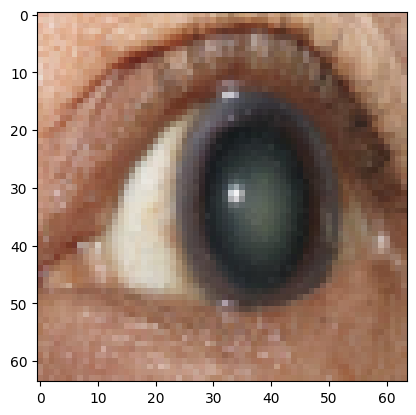

In [11]:
image_array = X[5]
print("Shape:", image_array.shape)
print("Dtype:", image_array.dtype)
print("Min:", image_array.min(), "Max:", image_array.max())
plt.imshow(image_array)
plt.show()


In [12]:
#seeing the length of Y
len(Y)

607

In [13]:
#seeing the length of Y
len(Y)

607

In [14]:
# turning Y to np array 
Y = np.array(Y)

In [15]:
#getting the shape of Y 
Y.shape

(607,)

In [16]:
# turning X to np array 
X= np.array(X)

In [17]:
X.shape

(607, 64, 64, 3)

In [18]:
# Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
#shape of x_train & y_train
#we will see the number of images will do training(8000) and the size(64,64) and the channels(RGB)
print(x_train.shape)
print(y_train.shape)

(485, 64, 64, 3)
(485,)


In [20]:
#shape of x_test & y_test
#we will see the number of images will do testing(2000) and the size(64,64) and the channels(RGB)
print(x_test.shape)
print(y_test.shape)

(122, 64, 64, 3)
(122,)


In [21]:
# Find the unique classes in y_test
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

Unique classes in y_test: [0 1 2]


In [22]:
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train , num_classes=3)
y_test = to_categorical(y_test , num_classes=3)

In [23]:
y_train[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [24]:
y_test[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

# Define the number of classes
num_classes = 3

# Define a sequential model
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 4
model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 5
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 6
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten layer to convert the 3D feature maps to 1D
model.add(Flatten())

# Dense layer with 64 neurons and ReLU activation
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with the number of neurons equal to the number of classes and softmax activation for multi-class classification
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model on the training data
batch_size = 32  # Define your batch size
history=model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=100, validation_data=(x_test, y_test), shuffle=False)


Epoch 1/100
16/16 [==============================] - 4s 33ms/step - loss: 1.0920 - accuracy: 0.3340 - val_loss: 1.0602 - val_accuracy: 0.3197
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9430 - accuracy: 0.4701 - val_loss: 0.6026 - val_accuracy: 0.8279
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5072 - accuracy: 0.7567 - val_loss: 0.3866 - val_accuracy: 0.8443
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3397 - accuracy: 0.8784 - val_loss: 0.4025 - val_accuracy: 0.8197
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2289 - accuracy: 0.9010 - val_loss: 0.1610 - val_accuracy: 0.9180
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1276 - accuracy: 0.9526 - val_loss: 0.1278 - val_accuracy: 0.9262
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0843 - accuracy: 0.9753 - val_loss: 0.0487 - val_accuracy: 0.9836
Epoch 8/100


In [26]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.0000
Test Accuracy: 100.00%


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the model predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

4/4 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        39

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Confusion Matrix:
[[44  0  0]
 [ 0 39  0]
 [ 0  0 39]]


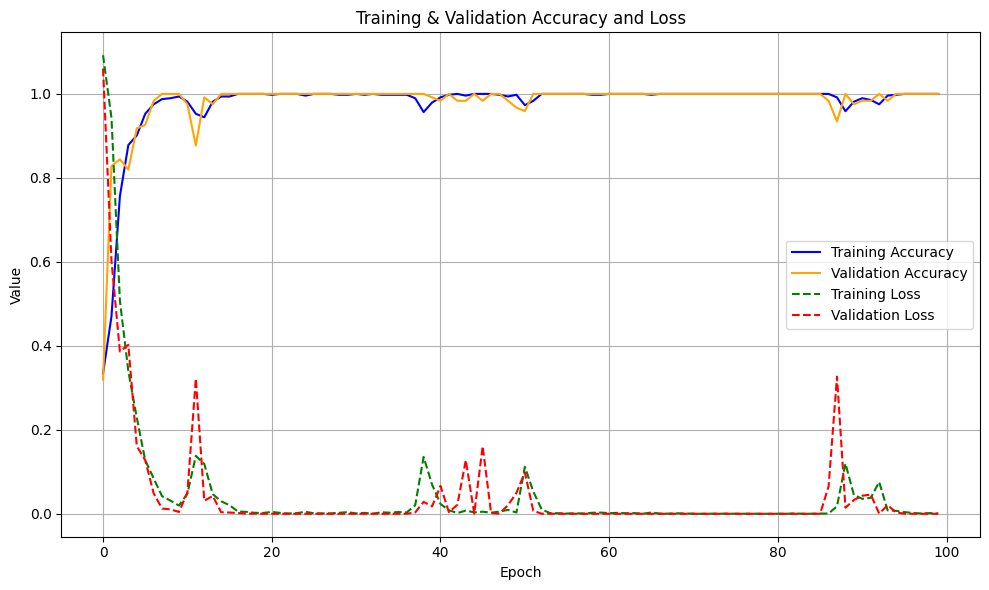

In [37]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Loss
plt.plot(history.history['loss'], label='Training Loss', color='green', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training & Validation Accuracy and Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


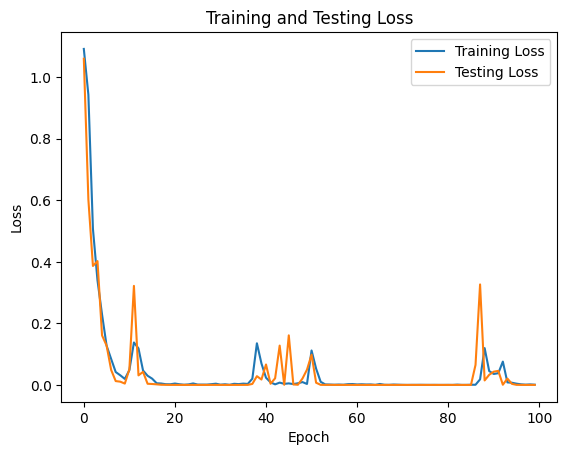

In [29]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

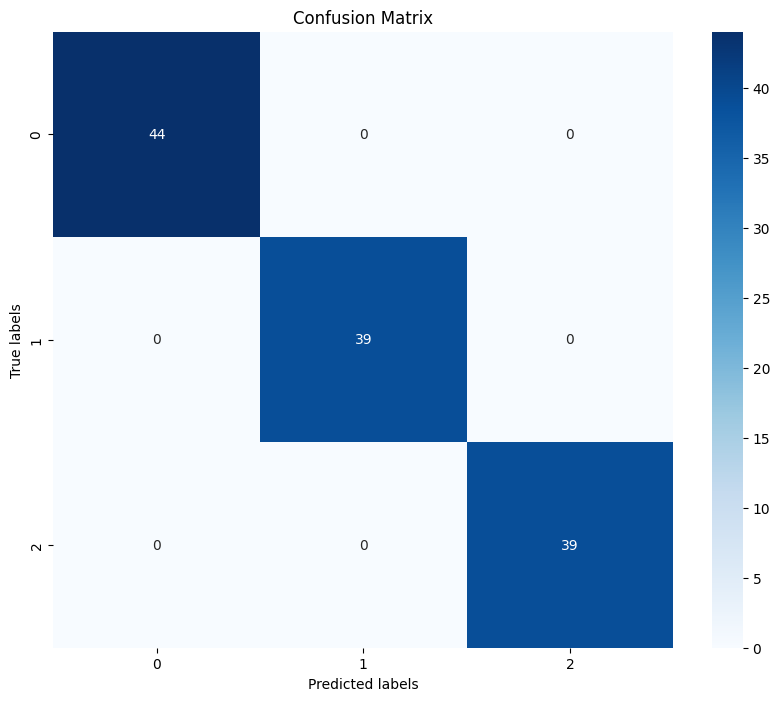

In [30]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 14ms/step


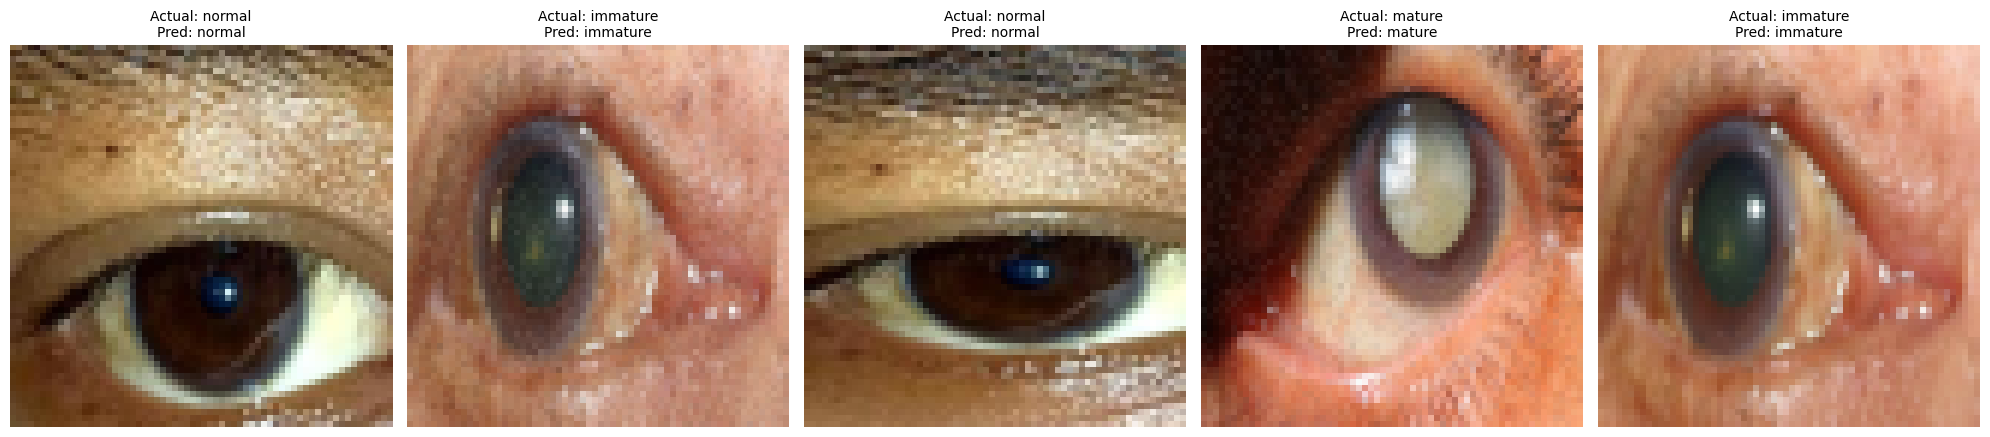

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Label klasifikasi
disease_labels = ['immature', 'mature', 'normal']

# Subplot 5 gambar + prediksi
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    current_image = x_test[i]
    actual_label = y_test[i]

    # Prediksi model
    prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(prediction)
    
    # Nama kelas
    predicted_class = disease_labels[predicted_label]
    actual_class = disease_labels[np.argmax(actual_label)]

    # Plot gambar
    axes[i].imshow(current_image)
    axes[i].axis('off')
    axes[i].set_title(f'Actual: {actual_class}\nPred: {predicted_class}', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
model.save('saved_model_cataract')  # Folder akan dibuat